In [ ]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [2]:
# Loading the data and setting the index
df = pd.read_csv('../data/bitcoin_price.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


<Figure size 2000x800 with 0 Axes>

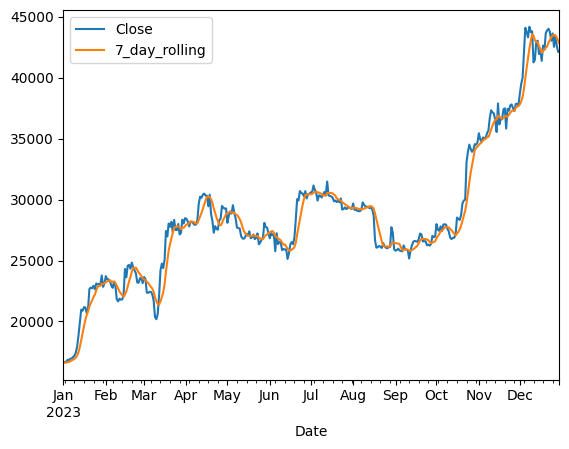

In [6]:
# 7-Day Rolling Average of the closing price
plt.figure(figsize=(20,8))
df['7_day_rolling'] = df['Close'].rolling(window=7).mean()
df[['Close', '7_day_rolling']].loc['2023'].plot()
plt.show()

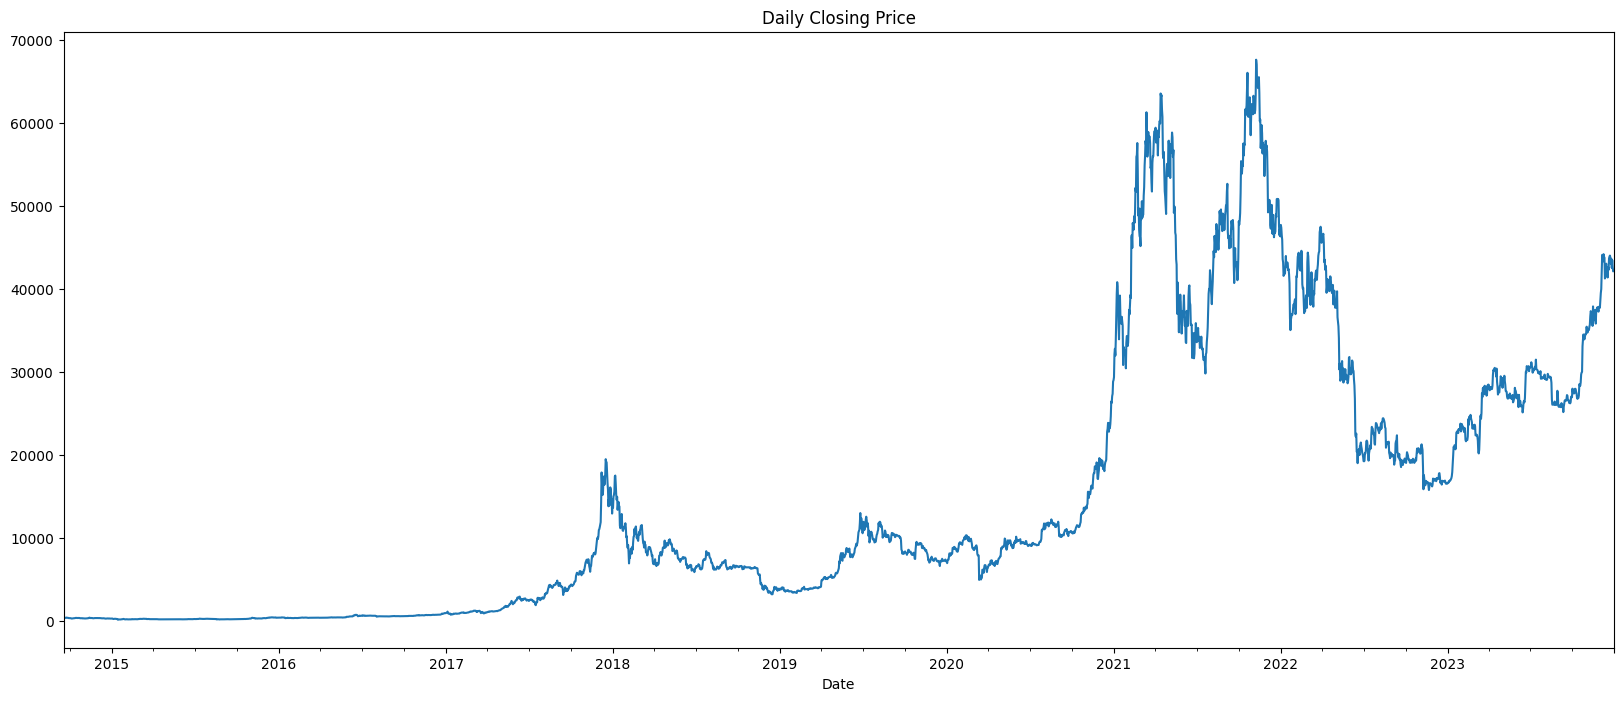

In [7]:
# Daily closing price Plot
plt.figure(figsize=(20,8))
df['Close'].plot(title='Daily Closing Price')
plt.show()

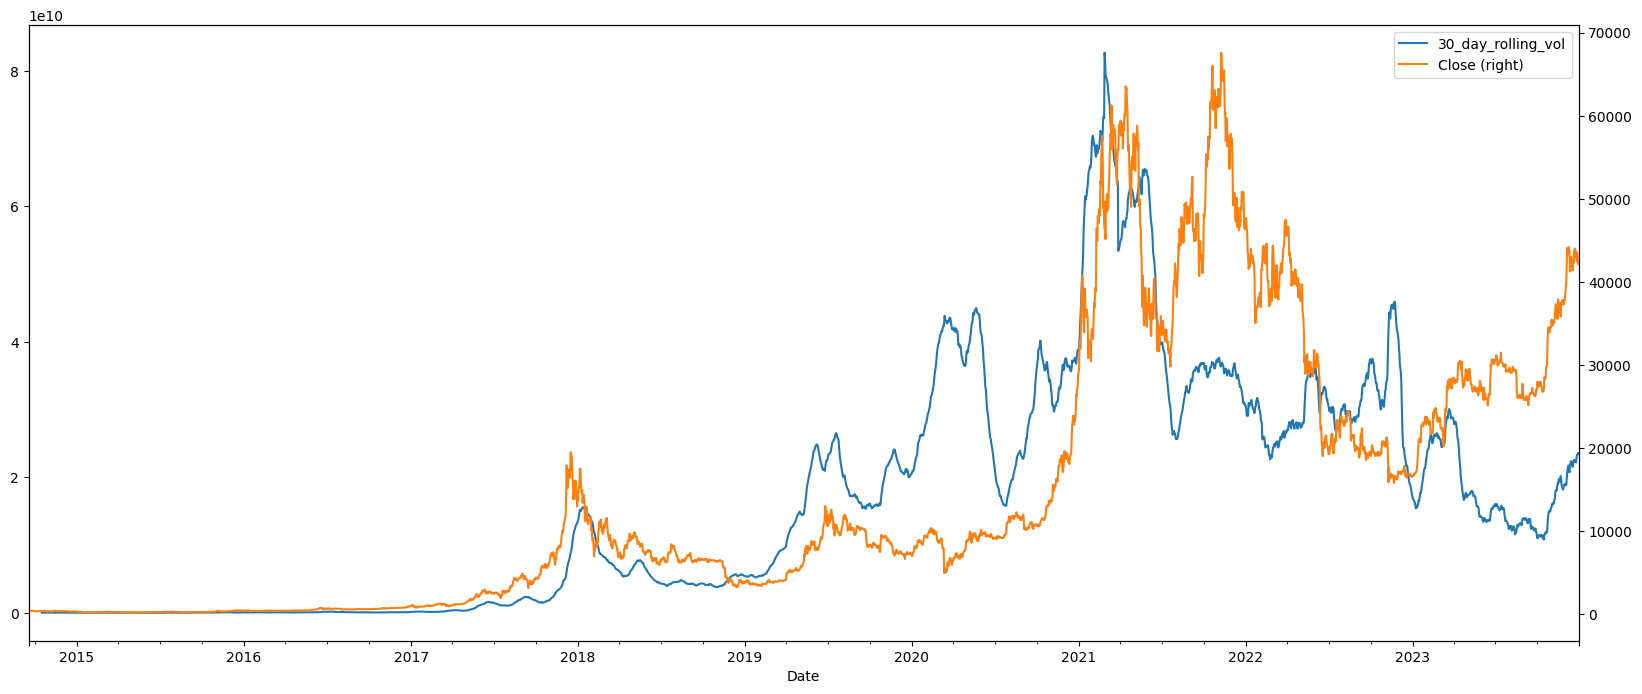

In [10]:
# Plotting Closing price on 30-day rolling average over Volume
plt.figure(figsize=(20,8))
df['30_day_rolling_vol'] = df['Volume'].rolling(window=30).mean()
df['30_day_rolling_vol'].plot(legend=True)

ax = df['Close'].plot(secondary_y=True, legend=True)
ax.set
plt.show()

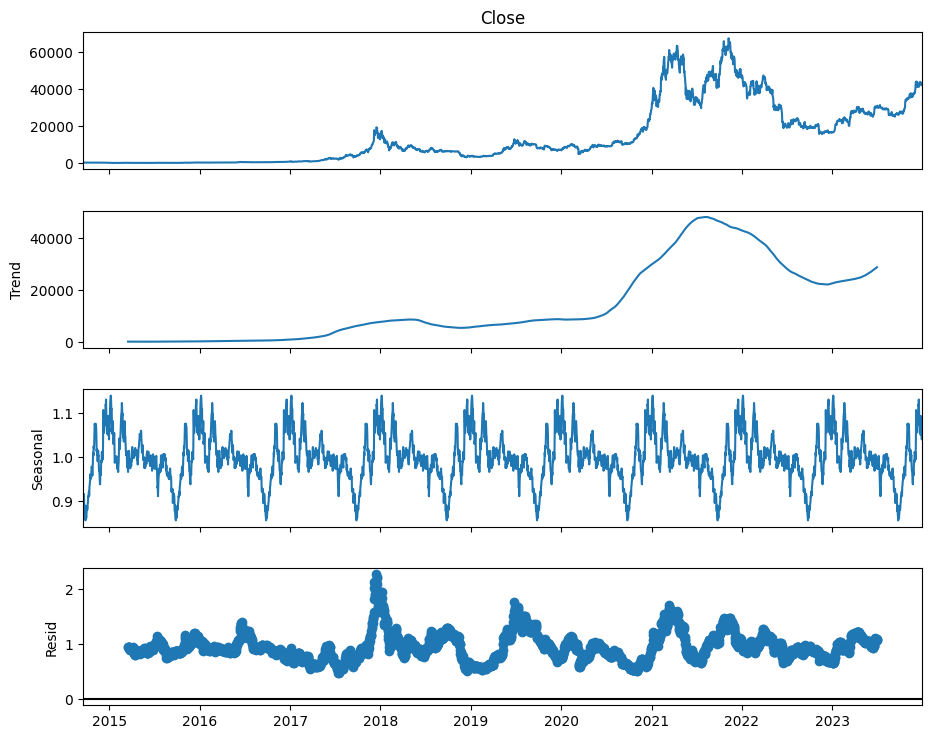

In [11]:
# Libraries
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose


# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(df['Close'], 
                                   model='multiplicative', 
                                   period=365)

fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

In [14]:
# Training and Testing Split
periods = 13
train, test = df.iloc[:-periods,0], df.iloc[-periods:,0]

d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\BTD\Data Visualization\.venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


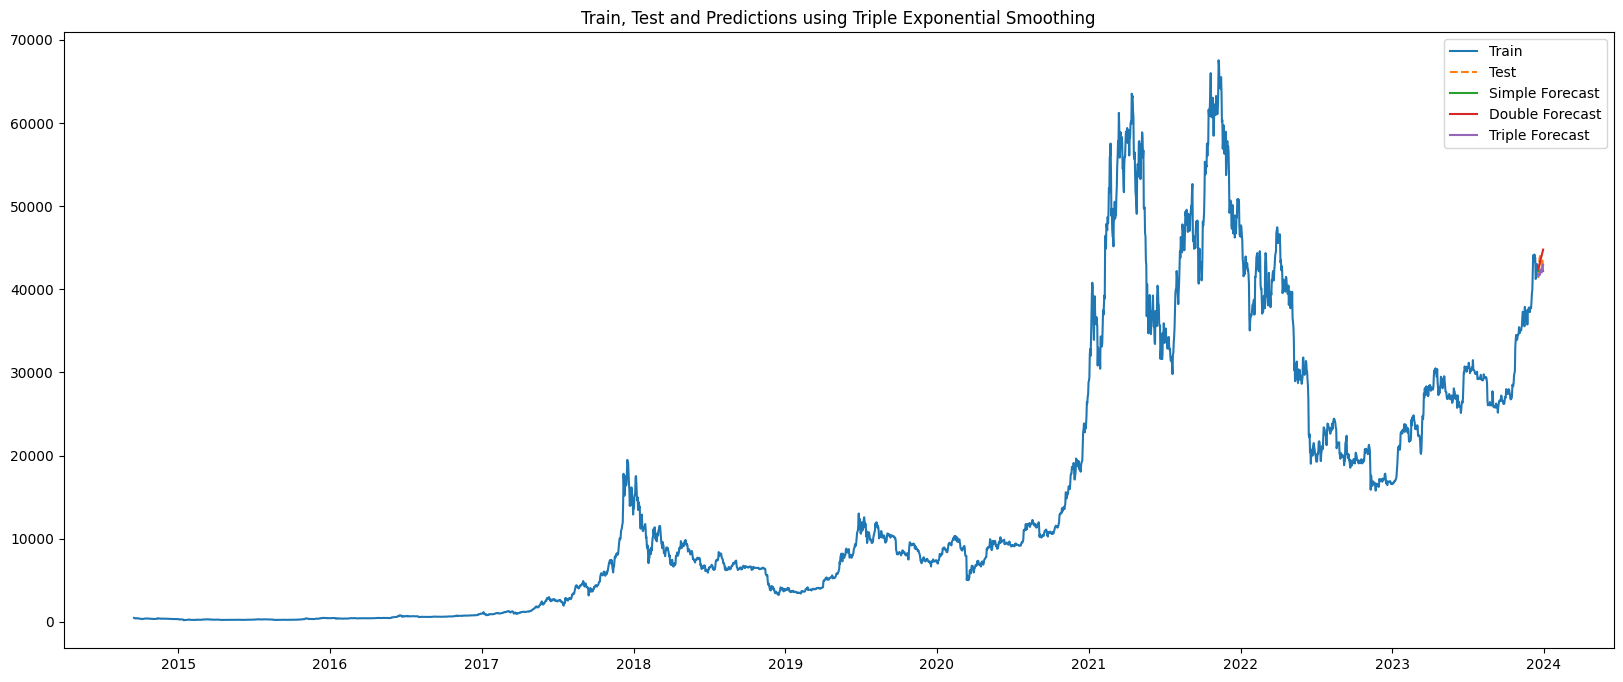

In [15]:
# plot training test and forecast
plt.figure(figsize=(20,8))

# Simple Exponential Smoothing Model and Prediction
model_simple = SimpleExpSmoothing(train).fit()
simple_predictions = model_simple.forecast(len(test))

# Double Exponential Smoothing Model and Prediction 
model_double = ExponentialSmoothing(train,
                                    trend='mul',
                                    seasonal=None).fit()
predictions_double = model_double.forecast(len(test))

# Triple Exponential Smoothing Model and Prediction 
model_triple = ExponentialSmoothing(train,
                                    trend='add',
                                    seasonal='mul',
                                    seasonal_periods=52).fit()
predictions_triple = model_triple.forecast(len(test))

plt.plot(train, label='Train')
plt.plot(test, label='Test', linestyle = '--')
plt.plot(simple_predictions, label='Simple Forecast')
plt.plot(predictions_double, label='Double Forecast')
plt.plot(predictions_triple, label='Triple Forecast')
plt.legend()
plt.title("Train, Test and Predictions using Triple Exponential Smoothing")

plt.show()